In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Datasets/cleandata_highValue.csv")

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.shape

(479, 6)

In [5]:
categorical_feature = df.columns[df.dtypes == 'object']
numerical_feature = df.columns[df.dtypes != 'object']

In [6]:
categorical_feature

Index(['Sex', 'BP', 'Cholesterol', 'Drug'], dtype='object')

In [7]:
numerical_feature

Index(['Age', 'Na_to_K'], dtype='object')

In [8]:
for fea in categorical_feature:
    unique = df[fea].unique()
    print(f"{fea} :  {unique}")

Sex :  ['F' 'M']
BP :  ['HIGH' 'LOW' 'NORMAL']
Cholesterol :  ['HIGH' 'NORMAL']
Drug :  ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [9]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [10]:
sex = ["F","M"]
BP = ['LOW','NORMAL','HIGH']
cholestrol = ['NORMAL','HIGH']
Drug = ["drugX","DrugY","drugA","drugB","drugC"]

In [11]:
df['Sex'] = df['Sex'].map({'F' :0,'M':1})
df['BP'] = df['BP'].map({'LOW':0,'NORMAL':1,"HIGH":2})
df["Cholesterol"] = df['Cholesterol'].map({"NORMAL":0,"HIGH":1})
df["Drug"] = df['Drug'].map({'drugX':0,"DrugY":1,"drugA":2,"drugB":3,"drugC":4})

In [12]:
x = df.drop(labels=['Drug'],axis=1)

In [13]:
y = df[['Drug']]

In [14]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,2,1,25.355000
1,47,1,0,1,13.093000
2,47,1,0,1,10.114000
3,28,0,1,1,7.798000
4,61,0,0,1,18.043000
...,...,...,...,...,...
474,25,1,1,0,18.554318
475,45,0,0,0,14.028384
476,23,1,0,0,13.967943
477,37,0,1,1,27.496105


In [15]:
y

,Drug
0,1
1,4
2,4
3,0
4,1
...,...
474,3
475,3
476,0
477,1


In [16]:
# Pipelines

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [18]:
num_pipeline = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler()),
    ]
)
cat_pipeline = Pipeline(
    steps = [
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('encoding',OrdinalEncoder(categories=[sex,BP,cholestrol,Drug])),
    ]
)

preprocessor = ColumnTransformer(
    [
        ('num_pipeline',num_pipeline,numerical_feature),
        ('cat_pipeline',cat_pipeline,categorical_feature)
    ]
)

In [19]:
num_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [20]:
cat_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoding',
                 OrdinalEncoder(categories=[['F', 'M'],
                                            ['LOW', 'NORMAL', 'HIGH'],
                                            ['NORMAL', 'HIGH'],
                                            ['drugX', 'DrugY', 'drugA', 'drugB',
                                             'drugC']]))])

In [21]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,1
1,47,1,0,1,13.093,4
2,47,1,0,1,10.114,4
3,28,0,1,1,7.798,0
4,61,0,0,1,18.043,1


In [22]:
df['Drug'].unique()

array([1, 4, 0, 2, 3], dtype=int64)

In [23]:
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,2,1,25.355
1,47,1,0,1,13.093
2,47,1,0,1,10.114
3,28,0,1,1,7.798
4,61,0,0,1,18.043


In [24]:
y.head()

,Drug
0,1
1,4
2,4
3,0
4,1


# train test split and standarisation

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
scalar = StandardScaler()
scalar.fit(x)
x_standard = scalar.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x_standard,y,test_size=0.30,stratify = y,random_state=35)

In [28]:
# for equal number of sample used for training and testing that why we used stratify

In [29]:
x_train.shape, x_test.shape

((335, 5), (144, 5))

In [30]:
y_train.shape, y_test.shape

((335, 1), (144, 1))

# Testing Datasets

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

score = cross_val_score(DecisionTreeClassifier(),x,y,cv=5)

In [33]:
score

array([0.375     , 0.4375    , 0.28125   , 0.15625   , 0.22105263])

In [34]:
score.mean()

0.2942105263157895

In [35]:
from sklearn.ensemble import BaggingClassifier

bagging_model = BaggingClassifier(
    estimator = DecisionTreeClassifier(),
    n_estimators = 100,
    max_samples = 0.50,
    oob_score = True,
    random_state = 0
)
bagging_model.fit(x_train,y_train)

C:\Users\papal\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.5,
                  n_estimators=100, oob_score=True, random_state=0)

In [36]:
bagging_model.oob_score_

0.43582089552238806

# Multi Model Traing 

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

In [39]:
support_vector = SVC(kernel="sigmoid",gamma=1)
Kneighbars = KNeighborsClassifier()
multi_nominal = MultinomialNB()
decision_tree = DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5)
logistic = LogisticRegression(solver = 'liblinear', penalty = 'l1')
random_forest = RandomForestClassifier() 
ada_boost = AdaBoostClassifier(n_estimators = 100, random_state = 42)
bagging = BaggingClassifier(estimator = DecisionTreeClassifier(),n_estimators = 100,max_samples = 0.5,oob_score = True,random_state = 42)
Gradient_boost = GradientBoostingClassifier(n_estimators = 100, random_state = 42)
# xg_boost = XGBClassifier(n_estimators = 100, random_state= 42)

In [40]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [41]:
from sklearn.pipeline import make_pipeline
base_learner = [
    ('support_vector', SVC(probability=True)),  # Enable probability for SVC
    ('logistic', LogisticRegression()),
    ('random_forest', RandomForestClassifier()),
    ('Kneighbars',KNeighborsClassifier())   
]
stacking = StackingClassifier(estimators=base_learner, final_estimator=DecisionTreeClassifier())

In [42]:
classification = {
    
    'Support Vector Classifier' : support_vector,
    'K-Neighbors Classifier'  : Kneighbars,
    'Decision Tree Classifier'  : decision_tree,
    'Logistic Regression'  : logistic,
    'Random Forest Classifier'  : random_forest,
    'AdaBoost Classifier': ada_boost,
    'Bagging Classifier' : bagging,
    'Stacking':stacking,
    'Gradient Boosting Classifier' : Gradient_boost,
}

In [43]:

def train_classifier(classification, X_train, y_train, X_test, y_test):
  accuracy_cv = cross_val_score(classification, X_train, y_train, cv=5, scoring='accuracy')
  precision_cv = cross_val_score(classification, X_train, y_train, cv=5, scoring='precision_macro')
  classification.fit(X_train, y_train) 
  y_pred = classification.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred,average="macro")
  matrix = confusion_matrix(y_test, y_pred)
  return accuracy, precision, matrix,accuracy_cv,precision_cv

In [44]:
accuracy_scores = []
precision_scores = []
accuracy_cv_scores = []
precision_cv_scores = []
for name, cls in classification.items():
  curr_accuracy, curr_precision, matrix,accuracy_cv, precision_cv = train_classifier(cls, x_train, y_train, x_test, y_test)
  
  print("Model name : ", name)
  print("Accuracy : ", curr_accuracy)
  print("Precision : ", curr_precision)
  print("Confusin-Matrix : ", matrix)
  print("Accuracy cross validation : ", accuracy_cv)
  print("Precision cross validation : ", precision_cv,"\n")
        
  accuracy_scores.append(curr_accuracy)
  precision_scores.append(curr_precision)
  accuracy_cv_scores.append(accuracy_cv.mean())
  precision_cv_scores.append(precision_cv.mean())

C:\Users\papal\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\papal\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\papal\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\papal\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Model name :  Support Vector Classifier
Accuracy :  0.2777777777777778
Precision :  0.17259796027911972
Confusin-Matrix :  [[14 16  1  1  3]
 [12 25  0  0  5]
 [ 4 18  0  1  0]
 [ 7 12  3  1  0]
 [ 9 10  1  1  0]]
Accuracy cross validation :  [0.2238806  0.29850746 0.25373134 0.31343284 0.23880597]
Precision cross validation :  [0.11472651 0.15664083 0.22666667 0.27614304 0.23432749] 

Model name :  K-Neighbors Classifier
Accuracy :  0.4097222222222222
Precision :  0.39079911316753424
Confusin-Matrix :  [[14 11  3  4  3]
 [ 7 27  1  2  5]
 [ 4 10  9  0  0]
 [ 9  4  4  5  1]
 [ 8  4  2  3  4]]
Accuracy cross validation :  [0.34328358 0.32835821 0.3880597  0.40298507 0.35820896]
Precision cross validation :  [0.30059829 0.26583663 0.40711706 0.37890909 0.42071429] 

Model name :  Decision Tree Classifier
Accuracy :  0.3194444444444444
Precision :  0.3141758241758242
Confusin-Matrix :  [[10 11  1  9  4]
 [13 17  2  2  8]
 [ 3  7  9  0  4]
 [ 7  1  6  5  4]
 [ 6  3  3  4  5]]
Accuracy cros

C:\Users\papal\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\papal\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\papal\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\papal\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Model name :  Logistic Regression
Accuracy :  0.3958333333333333
Precision :  0.31617424242424247
Confusin-Matrix :  [[13 15  2  3  2]
 [11 30  0  1  0]
 [ 3  9 10  1  0]
 [ 7  6  6  4  0]
 [10  4  6  1  0]]
Accuracy cross validation :  [0.37313433 0.40298507 0.43283582 0.47761194 0.3880597 ]
Precision cross validation :  [0.32185008 0.28969697 0.28245614 0.37847619 0.34105617] 



C:\Users\papal\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\papal\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\papal\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\papal\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

Model name :  Random Forest Classifier
Accuracy :  0.3402777777777778
Precision :  0.3098570983350871
Confusin-Matrix :  [[11 11  5  3  5]
 [ 6 22  2  7  5]
 [ 5  6  4  4  4]
 [ 7  3  3  7  3]
 [ 6  5  3  2  5]]
Accuracy cross validation :  [0.41791045 0.32835821 0.50746269 0.49253731 0.34328358]
Precision cross validation :  [0.37510272 0.29206349 0.43437229 0.39588235 0.38168498] 



C:\Users\papal\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\papal\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\papal\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\papal\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this 

Model name :  AdaBoost Classifier
Accuracy :  0.3055555555555556
Precision :  0.24770438641406384
Confusin-Matrix :  [[11 14  4  3  3]
 [ 6 23  8  1  4]
 [ 4  6  6  4  3]
 [ 6  4  7  4  2]
 [ 6  7  6  2  0]]
Accuracy cross validation :  [0.32835821 0.25373134 0.31343284 0.41791045 0.28358209]
Precision cross validation :  [0.30766317 0.19872222 0.29952381 0.32717458 0.29402446] 



C:\Users\papal\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\papal\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\papal\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\papal\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Model name :  Bagging Classifier
Accuracy :  0.3611111111111111
Precision :  0.3167508417508417
Confusin-Matrix :  [[13 11  4  2  5]
 [ 7 26  2  2  5]
 [ 3  7  3  4  6]
 [ 6  5  4  5  3]
 [ 4  5  5  2  5]]
Accuracy cross validation :  [0.44776119 0.35820896 0.50746269 0.43283582 0.41791045]
Precision cross validation :  [0.52564103 0.25111111 0.45       0.2897076  0.49380952] 



C:\Users\papal\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\papal\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\papal\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\papal\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

Model name :  Stacking
Accuracy :  0.3125
Precision :  0.29428316781257957
Confusin-Matrix :  [[10  4  7  8  6]
 [ 3 19  7  4  9]
 [ 2  7  2  9  3]
 [ 6  2  1  9  5]
 [ 7  1  4  4  5]]
Accuracy cross validation :  [0.28358209 0.34328358 0.43283582 0.25373134 0.20895522]
Precision cross validation :  [0.29645962 0.20793651 0.2818323  0.3422619  0.18589855] 



C:\Users\papal\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\papal\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\papal\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\papal\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

Model name :  Gradient Boosting Classifier
Accuracy :  0.375
Precision :  0.3483177038931515
Confusin-Matrix :  [[13 11  2  6  3]
 [ 7 24  2  4  5]
 [ 3  8  6  3  3]
 [ 4  5  4  6  4]
 [ 3  6  3  4  5]]
Accuracy cross validation :  [0.41791045 0.34328358 0.41791045 0.40298507 0.35820896]
Precision cross validation :  [0.40174603 0.30582751 0.35353205 0.33666667 0.34653491] 



# Overall Result

In [46]:

result_dataframe = pd.DataFrame({'Algorithm': classification.keys(), 'Accuracy': accuracy_scores, 
                                 'Precision' : precision_scores, "Accuracy CV":accuracy_cv_scores,
                                 "Precision CV":precision_cv_scores })

In [47]:
result_dataframe

,Algorithm,Accuracy,Precision,Accuracy CV,Precision CV
0,Support Vector Classifier,0.277778,0.172598,0.265672,0.201701
1,K-Neighbors Classifier,0.409722,0.390799,0.364179,0.354635
2,Decision Tree Classifier,0.319444,0.314176,0.379104,0.325441
3,Logistic Regression,0.395833,0.316174,0.414925,0.322707
4,Random Forest Classifier,0.340278,0.309857,0.417910,0.375821
5,AdaBoost Classifier,0.305556,0.247704,0.319403,0.285422
6,Bagging Classifier,0.361111,0.316751,0.432836,0.402054
7,Stacking,0.312500,0.294283,0.304478,0.262878
8,Gradient Boosting Classifier,0.375000,0.348318,0.388060,0.348861


In [48]:
max_accuracy_idx  = result_dataframe['Accuracy'].idxmax()

In [49]:
max_accuracy_idx

1

In [50]:
based_moel_name = result_dataframe.loc[max_accuracy_idx,'Algorithm']

In [51]:
based_moel_name

'K-Neighbors Classifier'

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

In [53]:
bagging.fit(x_train, y_train) 
y_pred = bagging.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average="macro")
recall = recall_score(y_test, y_pred,average="macro")
F1_score = f1_score(y_test, y_pred,average="macro")

C:\Users\papal\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
print("Accuracy   :", accuracy)
print("Precision  :", precision)
print("Recall     :", recall)
print("F1-score   :", F1_score)

Accuracy   : 0.3611111111111111
Precision  : 0.3167508417508417
Recall     : 0.31527950310559005
F1-score   : 0.31114823764336713


In [55]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.39      0.37      0.38        35
           1       0.48      0.62      0.54        42
           2       0.17      0.13      0.15        23
           3       0.33      0.22      0.26        23
           4       0.21      0.24      0.22        21

    accuracy                           0.36       144
   macro avg       0.32      0.32      0.31       144
weighted avg       0.35      0.36      0.35       144



# confusion matrix
plt.show()

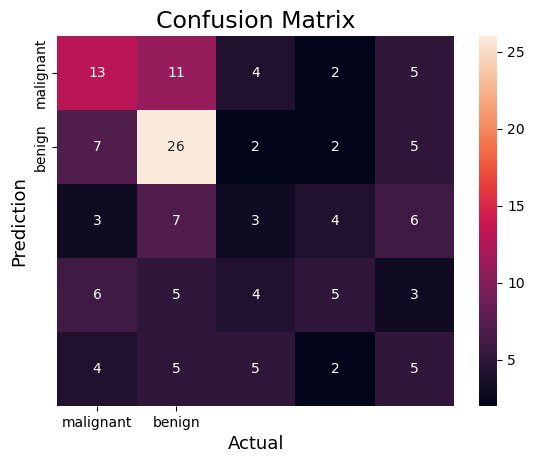

In [57]:
cm = confusion_matrix(y_test,y_pred)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [58]:
# 28	F	NORMAL	HIGH	7.798	drugX
# 61	F	LOW	HIGH	18.043	DrugY
# 47	M	LOW	HIGH	10.114	drugC

In [59]:
input_data = (47,1,0,1,10.114)
input_data_array = np.asarray(input_data)
input_data_reshaped =  input_data_array.reshape(1,-1)
print(input_data_reshaped)

[[47.     1.     0.     1.    10.114]]


In [60]:
prediction = stacking.predict(input_data_reshaped)
print(prediction)

[0]


In [61]:
if prediction == 0:
    print("DrugX")
elif prediction == 1:
    print("DrugY")
elif prediction == 2:
    print("DrugA")
elif prediction == 3:
    print("DrugB")
else:
    print("DrugC")

DrugX
